# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [ ]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileName = "ainvert.py"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileNames = ["parrot.bmp", "clock.bmp", "chessboard.bmp", "bart.png", "firetruck.jpg", "lena.bmp"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)


parrot = cv2.imread('parrot.bmp')
parrot = cv2.cvtColor(parrot, cv2.COLOR_BGR2GRAY)

chessboard = cv2.imread('chessboard.bmp')
chessboard = cv2.cvtColor(chessboard, cv2.COLOR_BGR2GRAY)


import ainvert

In [ ]:
def bilinear_interpolation(image, scale_x, scale_y):

  y,x = image.shape[:2]
  output_x, output_y = int(round(x*scale_x)), int(round(y*scale_y))

  output_image = np.zeros((output_y, output_x, *image.shape[2:]), dtype=image.dtype)

  for j in range(output_y):
    for i in range(output_x):
      j1 = min(y - 2, int(np.floor(j/scale_y)))
      i1 = min(x - 2, int(np.floor(i/scale_x)))

      i2 = i1 + 1
      j2 = j1 + 1


      org_j = int((j / scale_y) - j1)
      org_i = int((i / scale_x) - i1)

      A = image[j1,i1]
      B = image[j1,i2]
      C = image[j2,i2]
      D = image[j2,i1]

      output_image[j,i] = A*(1-org_i)*(1-org_j) + B*org_i*(1-org_j) + C*org_i*org_j + D*(1-org_i)*org_j

  return output_image

In [ ]:
from ainvert import A_invert

def compute_derivatives(image, i , j):
  h,w = image.shape[:2]
  def safe_access(i, j):
    return image[max(0, min(h - 1, j))][max(0, min(w-1, i))]

  Lx = (safe_access(i+1,j) - safe_access(i-1,j)) / 2
  Ly = (safe_access(i,j+1) - safe_access(i,j-1)) / 2
  Lxy = (safe_access(i+1,j+1) - safe_access(i-1,j) - safe_access(i,j-1) + safe_access(i,j)) / 4

  return Lx,Ly,Lxy

def bicubic_interpolation(image, scale_x, scale_y):

  y,x = image.shape[:2]
  output_x, output_y = int(round(x*scale_x)), int(round(y*scale_y))

  output_image = np.zeros((output_y, output_x, *image.shape[2:]), dtype=image.dtype)

  for j in range(output_y):
    for i in range(output_x):
      j1 = min(y - 2, int(np.floor(j/scale_y)))
      i1 = min(x - 2, int(np.floor(i/scale_x)))

      i2 = i1 + 1
      j2 = j1 + 1


      org_j = int((j / scale_y) - j1)
      org_i = int((i / scale_x) - i1)

      A = image[j1,i1]
      B = image[j1,i2]
      C = image[j2,i2]
      D = image[j2,i1]

      Ax,Ay,Axy = compute_derivatives(image, i1, j1)
      Bx,By,Bxy = compute_derivatives(image, i2, j1)
      Cx,Cy,Cxy = compute_derivatives(image, i2, j2)
      Dx,Dy,Dxy = compute_derivatives(image, i1, j2)

      x_vector = [A, B, C, D, Ax, Bx, Cx, Dx, Ay, By, Cy, Dy, Axy, Bxy, Cxy, Dxy]

      a = np.dot(A_invert, x_vector)

      res = 0
      for m in range(4):
        for n in range(4):
          res += a[m * 4 + n] * ((org_i)**m) * ((org_j)**n)

      output_image[j,i] = res


  return output_image


In [ ]:
def compare_images(image, resized_image, title="Obraz po interpolacji"):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(image, cmap="gray")
    axes[0].set_title("Obraz wejściowy")
    axes[0].axis("off")
    axes[0].set_aspect('equal')
    axes[0].set_xlim(0, image.shape[1])
    axes[0].set_ylim(image.shape[0], 0)

    axes[1].imshow(resized_image, cmap="gray")
    axes[1].set_title(title)
    axes[1].axis("off")
    axes[1].set_aspect('equal')
    axes[1].set_xlim(0, resized_image.shape[1])
    axes[1].set_ylim(resized_image.shape[0], 0)

    plt.tight_layout()
    plt.show()

    print(f'Image shape: {image.shape[:2]}')
    print(f'Resized image shape: {resized_image.shape[:2]}')


<ipython-input-41-3de09e65b5ee>:8: RuntimeWarning: overflow encountered in scalar subtract
  Lx = (safe_access(i+1,j) - safe_access(i-1,j)) / 2
<ipython-input-41-3de09e65b5ee>:10: RuntimeWarning: overflow encountered in scalar subtract
  Lxy = (safe_access(i+1,j+1) - safe_access(i-1,j) - safe_access(i,j-1) + safe_access(i,j)) / 4
<ipython-input-41-3de09e65b5ee>:9: RuntimeWarning: overflow encountered in scalar subtract
  Ly = (safe_access(i,j+1) - safe_access(i,j-1)) / 2
<ipython-input-41-3de09e65b5ee>:10: RuntimeWarning: overflow encountered in scalar add
  Lxy = (safe_access(i+1,j+1) - safe_access(i-1,j) - safe_access(i,j-1) + safe_access(i,j)) / 4


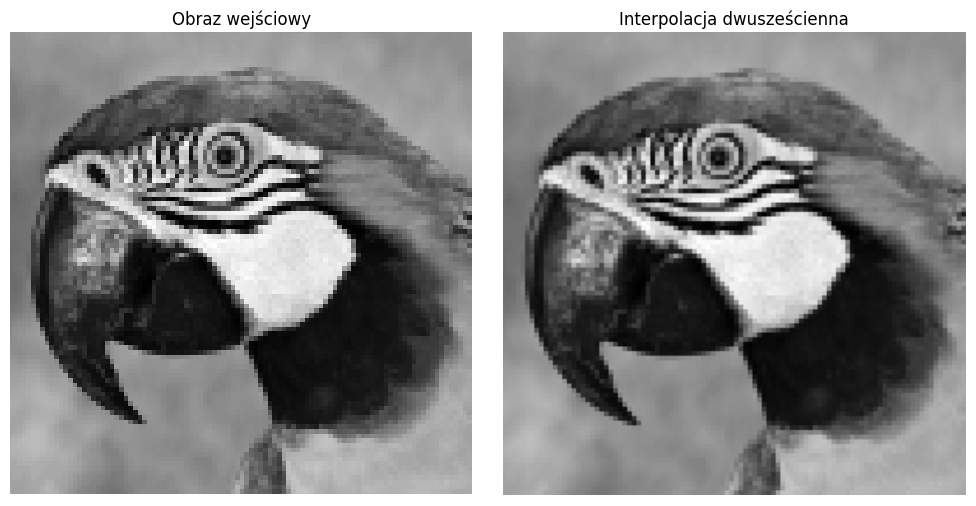

Image shape: (100, 100)
Resized image shape: (200, 200)


In [ ]:
resized_image = bicubic_interpolation(parrot,2,2)
compare_images(parrot, resized_image,"Interpolacja dwusześcienna")

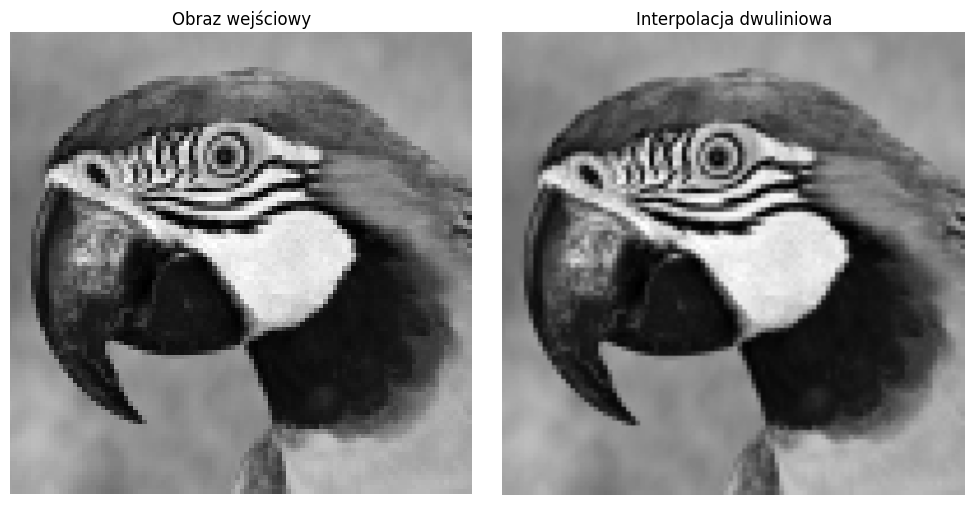

Image shape: (100, 100)
Resized image shape: (200, 200)


In [ ]:
resized_image = bilinear_interpolation(parrot,2,2)
compare_images(parrot, resized_image,"Interpolacja dwuliniowa")